<a href="https://colab.research.google.com/github/jarpit2003/Edta_raisin/blob/main/Raisin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as np
import matplotlib.pyplot as plt
#matplotlib inline
#sns.set(color_codes=True)

In [ ]:
# Load and inspect the text file
txt_file_path = '/content/Raisin_Dataset.txt'

with open(txt_file_path, 'r') as file:
    txt_content = file.readlines()

# Display the first few lines to understand the structure
print(txt_content[:10])


['Raisin Dataset\n', '\n', 'Abstract: Images of the Kecimen and Besni raisin varieties were obtained with CVS. A total of 900 raisins were used, including 450 from both varieties, and 7 morphological features were extracted.\n', '\n', 'Source:\n', 'Ilkay CINAR\n', 'Faculty of Technology,\n', 'Selcuk University, Konya, TURKEY.\n', 'ORCID ID : 0000-0003-0611-3316\n', 'ilkay.cinar@selcuk.edu.tr\n']


In [ ]:
import pandas as pd

# Load and inspect the Excel file
excel_file_path = '/content/Raisin_Dataset.xlsx'

# Read the Excel file
df_excel = pd.read_excel(excel_file_path)

# Display the first few rows of the DataFrame
df_excel.head()


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [ ]:
# Define the output CSV file path
csv_file_path = '/content/Raisin_Dataset.csv'

# Convert the DataFrame to a CSV file
df_excel.to_csv(csv_file_path, index=False)

# Confirm the CSV file path
csv_file_path


'/content/Raisin_Dataset.csv'

In [ ]:
df = pd.read_csv('/content/Raisin_Dataset.csv')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [ ]:
df.dtypes

Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
Extent             float64
Perimeter          float64
Class               object
dtype: object

In [ ]:
df.shape

(900, 8)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 8)


In [ ]:
df.count()

Area               900
MajorAxisLength    900
MinorAxisLength    900
Eccentricity       900
ConvexArea         900
Extent             900
Perimeter          900
Class              900
dtype: int64

In [ ]:
df= df.drop_duplicates()
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [ ]:
df.count()

Area               900
MajorAxisLength    900
MinorAxisLength    900
Eccentricity       900
ConvexArea         900
Extent             900
Perimeter          900
Class              900
dtype: int64

In [ ]:
print(df.isnull().sum())

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64


In [ ]:
df = df.dropna()
df.count()

Area               900
MajorAxisLength    900
MinorAxisLength    900
Eccentricity       900
ConvexArea         900
Extent             900
Perimeter          900
Class              900
dtype: int64

In [ ]:
print(df.isnull().sum())

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64


In [ ]:
import pandas as pd
import numpy as np

# Load your CSV file
df = pd.read_csv('/content/Raisin_Dataset.csv')

# Print original shape
print(f"Original dataset shape: {df.shape}")

# Identify numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Calculate Q1, Q3, and IQR for numeric columns only
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier condition
outlier_condition = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) |
                     (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers
df_clean = df[~outlier_condition]

# Print new shape
print(f"Clean dataset shape: {df_clean.shape}")
print(f"Number of rows removed: {df.shape[0] - df_clean.shape[0]}")

# Save the cleaned dataset
df_clean.to_csv('cleaned_data.csv', index=False)
print("Cleaned data saved to 'cleaned_data.csv'")

Original dataset shape: (900, 8)
Clean dataset shape: (795, 8)
Number of rows removed: 105
Cleaned data saved to 'cleaned_data.csv'


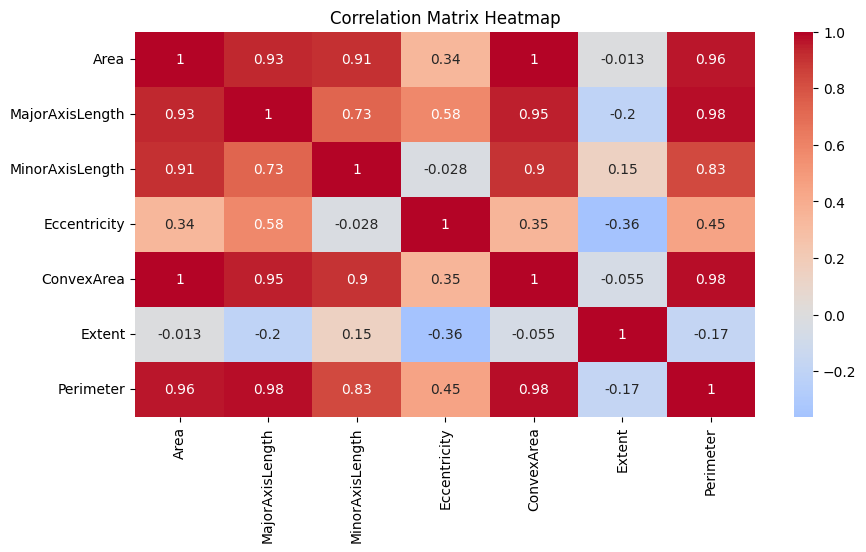

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv') # example of loading a DataFrame

plt.figure(figsize=(10, 5))
c = df.corr(numeric_only=True)
sns.heatmap(c, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()
